In [244]:
# Importing Lib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
# Reading the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full = pd.read_csv('fulfilment_center_info.csv')
meal = pd.read_csv('meal_info.csv')

In [246]:
# Checking the datasets

train.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [247]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [248]:
full.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [249]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [250]:
# Merging the datasets that need to be merged together 

train = pd.merge(train, meal, on="meal_id", how="outer")
train = pd.merge(train, full, on="center_id", how="outer")
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [251]:
test  = pd.merge(test, meal, on="meal_id", how="outer")
test = pd.merge(test, full, on="center_id", how="outer")
test = test.drop(['meal_id', 'center_id'], axis=1)

tcols = test.columns.tolist()
print(tcols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [252]:
train = train.drop(['center_id', 'meal_id'], axis=1)
train.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [253]:
cols = train.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [254]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [255]:
train = train[cols]

In [256]:
train.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [257]:
# Gaining information about the newly merged train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 13 columns):
id                       456548 non-null int64
week                     456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 48.8+ MB


In [258]:
# Checking null values 

train.isnull().sum()

id                       0
week                     0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

We see that there are no null values 

# Visualisations

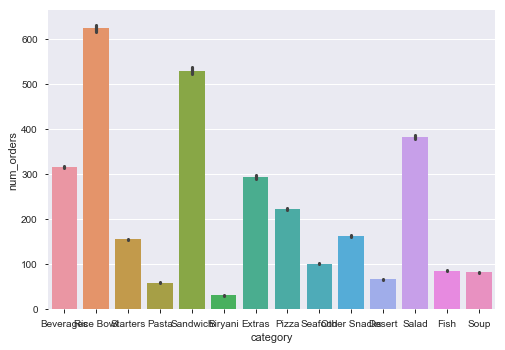

In [32]:
sns.barplot(train['category'],train['num_orders'])

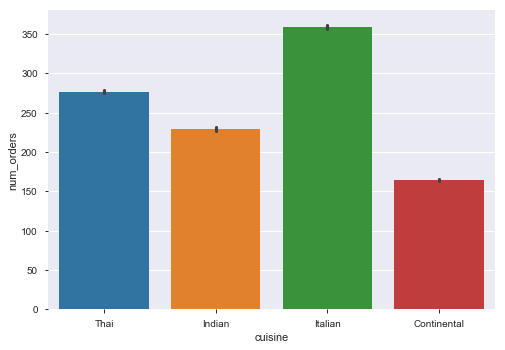

In [33]:
sns.barplot(train['cuisine'],train['num_orders'])

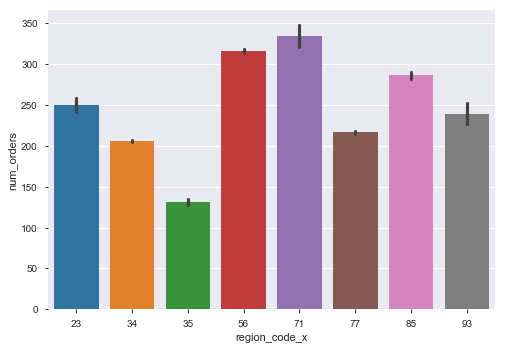

In [35]:
sns.barplot(train['region_code_x'],train['num_orders'])

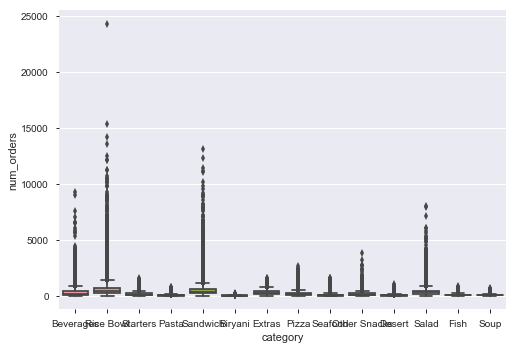

In [37]:
sns.boxplot(x='category',y='num_orders',data=train)

In [38]:
print("Total number of centers : ",train['center_id'].nunique())

Total number of centers :  77


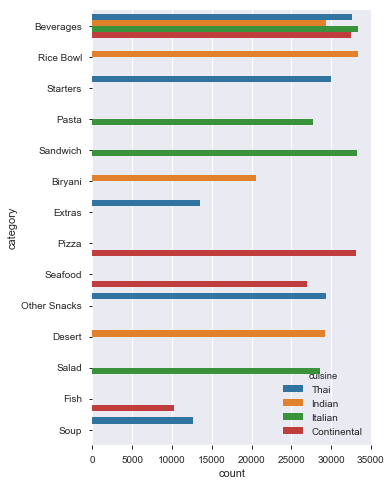

In [40]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax=ax)
plt.show()

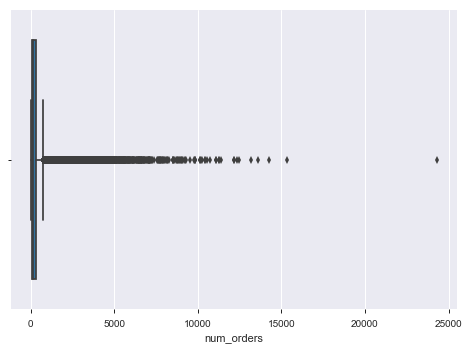

In [170]:
sns.boxplot(x='num_orders',data=train)

In [171]:
# Removing outliet or number of orders

outlier_index = train[(train['num_orders']>15000)].index

In [172]:
train.drop(outlier_index,inplace = True)

In [174]:
train['num_orders'] = np.log1p(train['num_orders'])

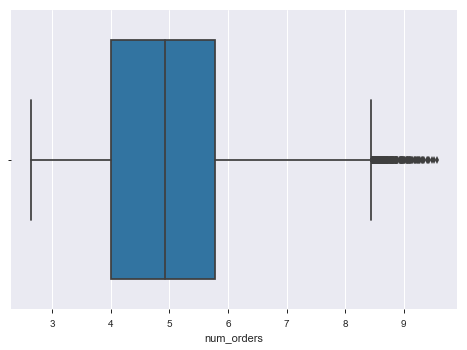

In [175]:
sns.boxplot(x='num_orders',data=train)

In [139]:
'''
train['checkout_price'] = np.log1p(train['checkout_price'])
train['base_price'] = np.log1p(train['base_price'])


train['discount_on_base'] = (train['base_price'] - train['checkout_price']) / train['base_price']

train["discount_ratio"] = train["base_price"] / train["checkout_price"]



In [140]:
'''
# Doing the same for the test dataset 

test['checkout_price'] = np.log1p(test['checkout_price'])
test['base_price'] = np.log1p(test['base_price'])


test['discount_on_base'] = (test['base_price'] - test['checkout_price']) / test['base_price']

test["discount_ratio"] = test["base_price"] / test["checkout_price"]



In [259]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder()
train['center_type'] = lb1.fit_transform(train['center_type'])

lb2 = LabelEncoder()
train['category'] = lb1.fit_transform(train['category'])

lb3 = LabelEncoder()
train['cuisine'] = lb1.fit_transform(train['cuisine'])



In [260]:
train.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type                int64
op_area                  float64
category                   int64
cuisine                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [261]:
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
test = test[tcols]

lb1 = LabelEncoder()
test['center_type'] = lb1.fit_transform(test['center_type'])

lb2 = LabelEncoder()
test['category'] = lb1.fit_transform(test['category'])

lb3 = LabelEncoder()
test['cuisine'] = lb1.fit_transform(test['cuisine'])

test.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type                int64
op_area                  float64
category                   int64
cuisine                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
dtype: object

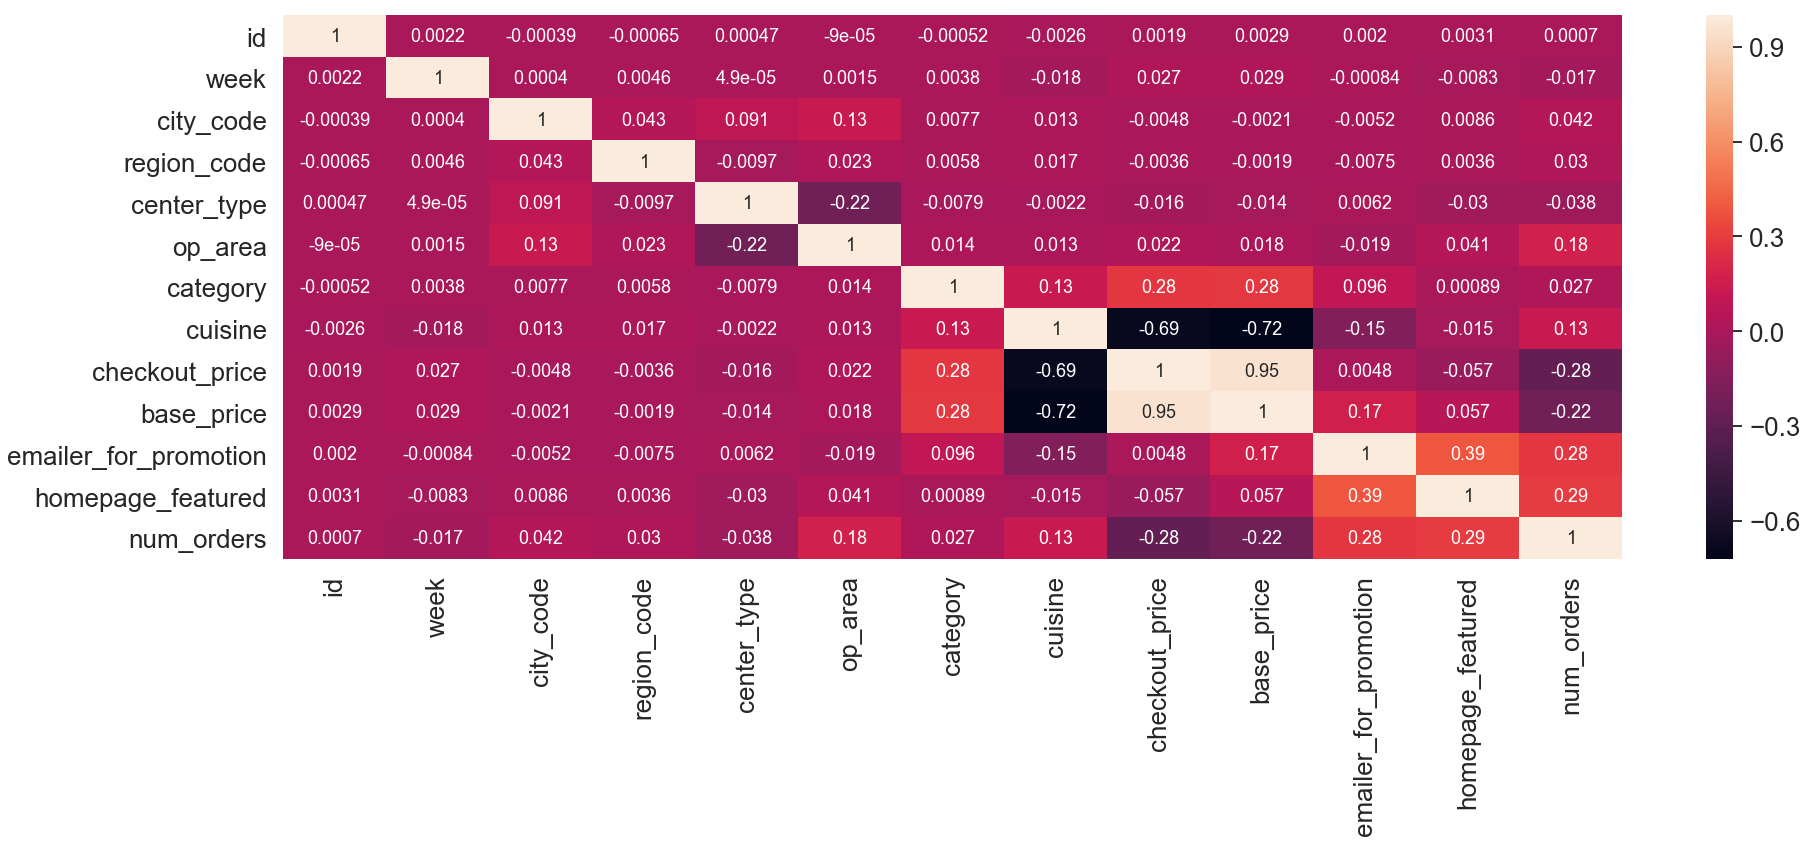

In [262]:
sns.heatmap(train.corr() , annot = True )

In [263]:
test.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,647,56,2,2.0,0,3,158.11,159.11,0,0
1,1262649,147,647,56,2,2.0,0,3,159.11,159.11,0,0
2,1453211,149,647,56,2,2.0,0,3,157.14,158.14,0,0
3,1262599,150,647,56,2,2.0,0,3,159.14,157.14,0,0
4,1495848,151,647,56,2,2.0,0,3,160.11,159.11,0,0


In [179]:
# Preparing a Baseline model



In [180]:
# Importing LIB


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics 
from xgboost import XGBRegressor 


In [193]:
# XG BOOst


XG = XGBRegressor()
XG.fit(X_train, y_train)

y_predXG = XG.predict(test)


XG.score(X_train, y_train)


submitXG = pd.DataFrame({
    'id' : test['id'],
    'num_orders' :y_predXG
})

submitXG.to_csv("submissionXGB.csv", index=False)

[14:01:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [194]:
# LINEAR REGRESSION

LR = LinearRegression() 

LR.fit(X_train, y_train)

y_predLR = LR.predict(test) 


LR.score(X_train, y_train)

submitLR = pd.DataFrame({
    'id' : test['id'],
    'num_orders' :y_predLR
})

submitLR.to_csv("submissionLR.csv", index=False)

In [195]:
# LASSO

L = Lasso() 

L.fit(X_train, y_train) 

y_predL = L.predict(test) 


L.score(X_train, y_train)

submitL = pd.DataFrame({
    'id' : test['id'],
    'num_orders' : y_predL
})

submitL.to_csv("submissionL.csv", index=False)

In [196]:
# ELASTIC NET

EN = ElasticNet()

EN.fit(X_train, y_train) 

y_predEN = EN.predict(test) 

EN.score(X_train, y_train)

submitEN = pd.DataFrame({
    'id' : test['id'],
    'num_orders' : y_predEN
})

submitEN.to_csv("submissionEN.csv", index=False)

In [197]:
# Decision Tree

DT = DecisionTreeRegressor()

DT.fit(X_train, y_train)

y_predDT = DT.predict(test)



DT.score(X_train, y_train)

submitDT = pd.DataFrame({
    'id' : test['id'],
    'num_orders' : y_predDT
})

submitDT.to_csv("submissionDT.csv", index=False)

In [198]:
# KNN

KNN = KNeighborsRegressor()

KNN.fit(X_train, y_train)

y_predKNN = KNN.predict(test)


KNN.score(X_train, y_train)

submitKNN = pd.DataFrame({
    'id' : test['id'],
    'num_orders' : y_predKNN
})
submitKNN.to_csv("submissionKNN.csv", index=False)

In [203]:
# Using VIF

# VIF

#functions
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    removed=[]
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print(s.index[0],', VIF: ',s.iloc[0])
            removed.append(s.index[0])
        else:
            break
    return removed

In [204]:
# Checking VIF

#4. Check multicolinearity
removed_by_vif=remove_by_vif(X_train.copy())




base_price , VIF:  103.87061350740053
city_code , VIF:  55.90022329332298
id , VIF:  31.744991251329736
op_area , VIF:  11.664250594907262
region_code , VIF:  8.500153774000466


In [205]:
# Columns to be dropped using VIF

X_train=X_train .drop(removed_by_vif,axis=1)

In [210]:
# Columns to be dropped using VIF

X_train=X_train .drop('week',axis=1)

In [211]:
# Checking VIF

#4. Check multicolinearity
removed_by_vif=remove_by_vif(X_test.copy())

week , VIF:  184.9609279354694
base_price , VIF:  160.51722420484782
city_code , VIF:  55.86212569611995
id , VIF:  30.2747685683675
op_area , VIF:  11.350618889259014
region_code , VIF:  8.439677735149512


In [213]:
# Columns to be dropped using VIF

X_test=X_test.drop(removed_by_vif,axis=1)

In [214]:
# LINEAR REGRESSION

LR = LinearRegression() 

LR.fit(X_train, y_train)

y_predLR = LR.predict(X_test) 


LR.score(X_train, y_train)



0.2794737794113382

In [215]:
submitLRVIF = pd.DataFrame({
    'id' : test['id'],
    'num_orders' :y_predLR
})

submitLR.to_csv("submissionLRVIF.csv", index=False)

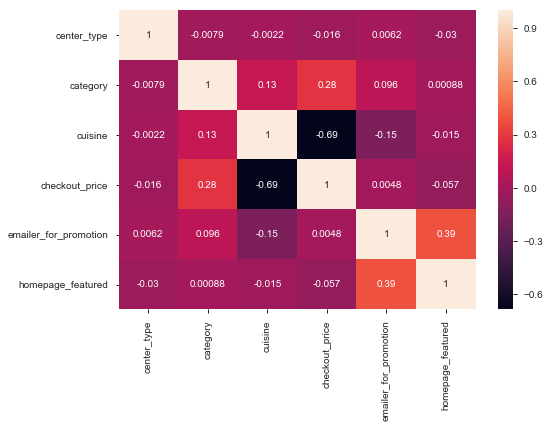

In [221]:
sns.heatmap(X_train.corr() , annot = True)

In [222]:
# XG BOOst


XG = XGBRegressor()
XG.fit(X_train, y_train)

y_predXG = XG.predict(X_test)


XG.score(X_train, y_train)




[21:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6456941606123601

In [223]:
submitXGVIF = pd.DataFrame({
    'id' : test['id'],
    'num_orders' :y_predXG
})

submitXG.to_csv("submissionXGBVIF.csv", index=False)

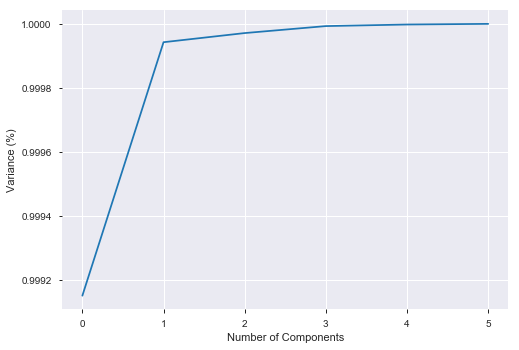

In [224]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data


from sklearn.decomposition import PCA

pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)




#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.savefig('PCA')
plt.show()

In [233]:
# XG BOOst


XG = XGBRegressor()
XG.fit(X_train_pca, y_train)

y_predXG = XG.predict(X_test_pca)

y_predXG[y_predXG<0] = 0

XG.score(X_train_pca, y_train)





[22:07:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6509847768941643

In [232]:
submitXGPCA = pd.DataFrame({
    'id' : test['id'],
    'num_orders' :y_predXG
})

submitXG.to_csv("submissionXGBPCA.csv", index=False)

In [231]:
# LINEAR REGRESSION

LR = LinearRegression() 

LR.fit(X_train_pca, y_train)

y_predLR = LR.predict(X_test_pca) 


LR.score(X_train_pca, y_train)




0.27947377941133833

# Tried a differnt approach to tune 

In [267]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [268]:
param_grid = { "min_samples_split": [2, 4, 8, 16], "min_samples_leaf": [1, 2, 3, 4], "max_leaf_nodes": [None, 10, 20, 100] }
grid_cv_dtm = GridSearchCV(DT, param_grid, cv=5)
grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 4, 8, 16], 'min_samples_leaf': [1, 2, 3, 4], 'max_leaf_nodes': [None, 10, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [269]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.7171079714100081
Best Hyperparameters::
{'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 16}


In [270]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.781938,0.109466,0.058803,0.009283,None,1,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.577069,0.621533,...,0.589040,0.019289,32,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,2.529620,0.196992,0.047278,0.002922,None,1,4,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.584029,0.647613,...,0.608648,0.022861,26,0.983882,0.979859,0.980676,0.981767,0.980967,0.981430,0.001369
2,2.389815,0.282722,0.036897,0.000729,None,1,8,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.637125,0.676346,...,0.645387,0.017630,12,0.944413,0.937441,0.942266,0.942751,0.940467,0.941468,0.002374
3,2.167457,0.109024,0.029843,0.000609,None,1,16,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.675971,0.711447,...,0.683165,0.017863,8,0.886872,0.883837,0.886727,0.894388,0.888899,0.888144,0.003514
4,2.373471,0.077539,0.041811,0.000566,None,2,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 2...",0.630145,0.649906,...,0.636254,0.010276,14,0.964520,0.961465,0.961635,0.963977,0.960538,0.962427,0.001543


In [273]:
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.493
MSE::-74697.876


In [278]:
pred = DT.predict(test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id' : test['id'],
    'num_orders' : pred
})


submitDTT = pd.DataFrame({
    'id' : test['id'],
    'num_orders' :pred
})

submitLR.to_csv("submissionDTT.csv", index=False)

In [264]:
# trying a new way

X = train.drop ('num_orders' , axis = 1)
y = train['num_orders']




from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [265]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 72.17800780752273


In [266]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 123.12366280309608


# Tried all the models and more after tuning 

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor

cv=StratifiedKFold(n_splits=5,random_state=5)

models = []
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))

models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Bagging', BaggingRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPRegressor ( max_iter=1000)))

results = []
names = []
final_scores=[]
for name, model in models:
    accuracy=cross_val_score(model, X_train, y_train,cv=cv)
    results.append(accuracy)
    names.append(name)
    score_mean = "%s: %f" % (name, accuracy.mean())
    final_scores.append(score_mean)
final_scores